In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_histogram(data, num_bins, bottom=None):
    plt.hist(data, bins=num_bins, bottom=bottom, color='blue', alpha=0.7)
    plt.xlabel('z value')
    plt.ylabel('Frequency')
    plt.title('Sensor calibration errors, normalised by standard deviation')

# Load data from CSV file
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    return data

# where to save plots
overwrite = True
save_path = "/home/luke/Documents/thesis_plots/"

import sys
pathhere = "/home/luke/mujoco-devel/rl/"
sys.path.insert(0, pathhere)
from env.MjEnv import MjEnv
mjenv = MjEnv()

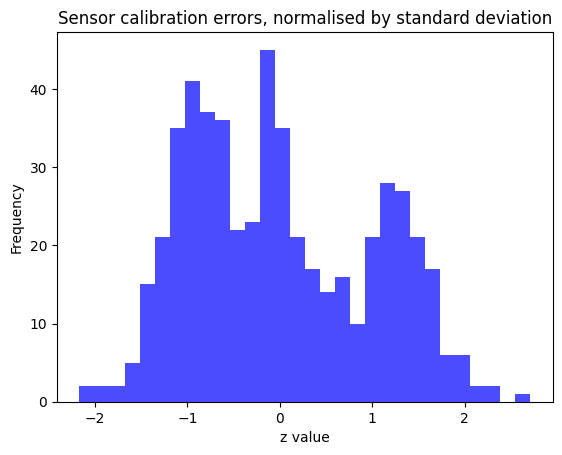

In [2]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'raw_sensor_calibrations.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_name = 'normalised'
data_to_plot = data[column_name]

# Number of bins (you can change this)
num_bins = 30

plot_histogram(data["normalised"], num_bins)
# plot_histogram(data["error / mN"], num_bins)

plt.gcf()
if False and overwrite: plt.savefig(save_path + "calibration_errors_distribution.png")
plt.show()

/tmp/ipykernel_84482/300713432.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


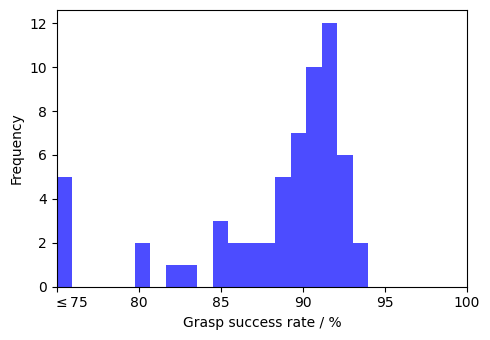

In [3]:
def plot_histogram(data, num_bins, bottom=None):
    plt.hist(data, bins=num_bins, bottom=bottom, color='blue', alpha=0.7)
    plt.xlabel('z value')
    plt.ylabel('Frequency')
    plt.title('Sensor calibration errors, normalised by standard deviation')

# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'training_spread.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_name = ' set8_fullset_1500'
data_to_plot = np.array(data[column_name]) * 100
data_to_plot = np.clip(data_to_plot, 75, 100)
num_bins = 20

fig, axs = plt.subplots(1, 1)

_, bins, patches = axs.hist(data_to_plot, bins=num_bins, color="blue", alpha=0.7)
axs.set_xlabel("Grasp success rate / %")
axs.set_ylabel("Frequency")
axs.set_xlim([75, 100])

# xlabels = np.round(bins[0:].astype(float),2).astype(str)
# xlabels[0] += '+'
# N_labels = len(xlabels)

# plt.xticks(num_bins * np.arange(N_labels))
# axs.set_xticklabels(xlabels)
# axs.set_xlim([0.75, 1.0])

labels = axs.get_xticklabels()
labels[0] = r"      $\leq$75"
axs.set_xticklabels(labels)

fig.set_size_inches(5, 3.5)
fig.tight_layout()

if True and overwrite: fig.savefig(save_path + "training_spread.png")

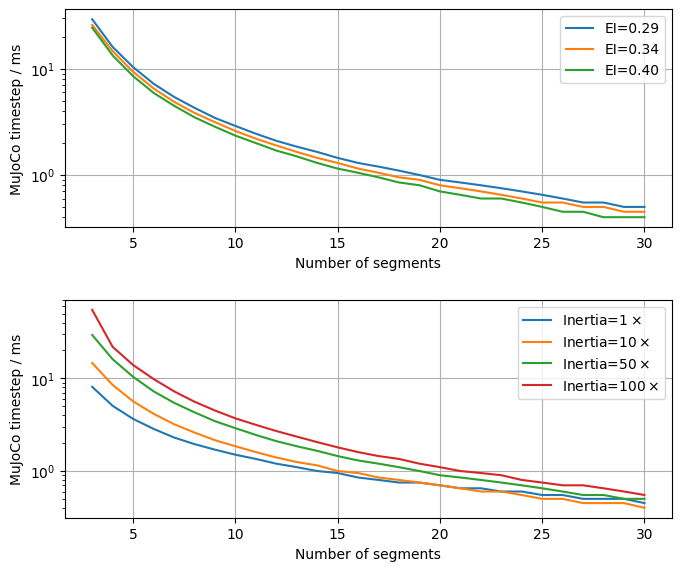

In [4]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'mujoco_timesteps.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)
segments = list(range(3, 31))

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_names = [
  "t=0.9, w=28.0, inertia=1",
  "t=0.9, w=28.0, inertia=10",
  "t=0.9, w=28.0, inertia=50",
  "t=0.9, w=28.0, inertia=100",
  "t=1.0, w=24.0, inertia=1",
  "t=1.0, w=24.0, inertia=10",
  "t=1.0, w=24.0, inertia=50",
  "t=1.0, w=24.0, inertia=100",
  "t=1.0, w=28.0, inertia=1",
  "t=1.0, w=28.0, inertia=10",
  "t=1.0, w=28.0, inertia=50",
  "t=1.0, w=28.0, inertia=100",
]

data_indexes_to_plot = [
  [2, 6, 10],
  [0, 1, 2, 3],
]
legends = [
  ["EI=0.29", "EI=0.34", "EI=0.40"],
  [r"Inertia=$1\times$", r"Inertia=$10\times$", r"Inertia=$50\times$", r"Inertia=$100\times$"],
]

plot_relative = False

fig, axs = plt.subplots(2 + plot_relative, 1, sharex=False)

for i in range(len(data_indexes_to_plot)):
  for j in range(len(data_indexes_to_plot[i])):
    axs[i].plot(segments, data[column_names[data_indexes_to_plot[i][j]]])
  axs[i].legend(legends[i])
  axs[i].set_ylabel("MuJoCo timestep / ms")
  axs[i].set_xlabel("Number of segments")
  axs[i].set_yscale("log")
  axs[i].grid()

# now plot the relative change for the inertias
if len(axs) == 3:
  timesteps = [np.array(data[column_names[data_indexes_to_plot[1][j]]]) for j in range(len(data_indexes_to_plot[1]))]
  relative = np.array([np.divide(timesteps[i + 1], timesteps[0]) for i in range(len(data_indexes_to_plot[1]) - 1)])
  axs[2].plot(segments, [1 for i in range(len(segments))], "--")
  for i in range(len(relative)):
    axs[2].plot(np.array(segments), relative[i])
  axs[2].legend(legends[1][:])
  axs[2].grid()
  axs[2].set_ylim(ymin=0)
  axs[2].set_xlabel("Number of segments")
  axs[2].set_ylabel(r"Relative speed up vs $1\times$ inertia")
  Ns = 8
  print(f"Speed up factor at N = {Ns} is [{relative[0][Ns-3]:.2f}, {relative[1][Ns-3]:.2f}, {relative[2][Ns-3]:.2f}]") # -3 as N starts at 3

fig.tight_layout()
fig.set_size_inches(7, 3 * len(axs))
if False and overwrite: fig.savefig(save_path + "mujoco_timesteps.png")

Profile errors, unit = mN
All errors [[196.35480642318726, 204.7245672770909, 218.7190701564153], [108.10001691182454, 121.63747102022171, 124.3307636334346], [27.244672179222107, 55.436929066975914, 98.35796696799142]]
All maximum errors [[199.58198070526123, 222.33331203460693, 229.60996627807617], [114.60000276565552, 130.5999755859375, 142.4999237060547], [37.86337375640869, 70.14989852905273, 281.2466621398926]]
Average of all errors is 128.32291818181818
Maximum of all errors is 218.7190701564153
Maximum maximum error is 281.2466621398926


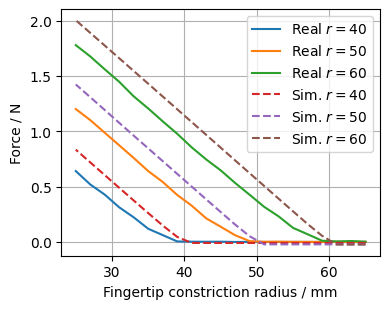

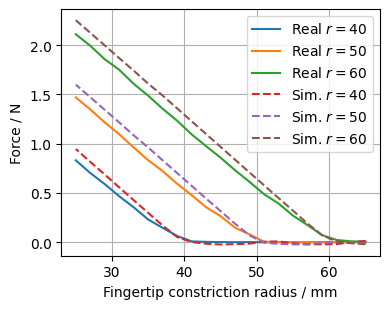

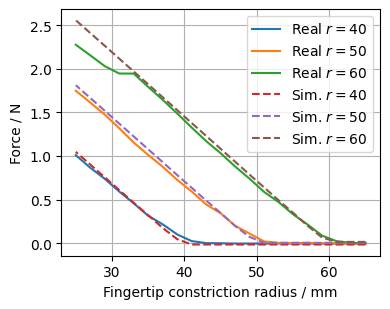

In [5]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = "sim_vs_real_forces.csv"

# Load data from CSV file
data = load_data_from_csv(csv_file_path)
segments = list(range(3, 31))

stiffnesses = [
  "EI1", 
  "EI2", 
  "EI3"
]

eis = [r"$EI=0.29$Nm$^2$", r"$EI=0.34$Nm$^2$", r"$EI=0.40$Nm$^2$"]

subplot = False
if subplot:
  fig, axs = plt.subplots(1, len(stiffnesses))
else:
  fig = []
  axs = []
  for i in range(len(stiffnesses)):
    f, a = plt.subplots(1, 1)
    fig.append(f)
    axs.append(a)

# number of data points at the start to skip (130 -> 104mm)
skips = [16, 16, 16]

# number of datapoints to offset sim compared to real, +ve will fail due to [:offset]
offsets = [-2, -1, -1]
# offsets = [-4, -2, 0]
offsets = [0, 0, 0]
offset_mm = [-4, -2, 0]
offset_mm = [0, 0, 0]

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_names = [
  "XY pos", # 0 
  "Real 80", # 1 
  "Real 100", # 2 
  "Real 120", # 3 
  "Sim 70", # 4
  "Sim 80", # 5
  "Sim 90", # 6
  "Sim 100", # 7
  "Sim 110", # 8
  "Sim 120", # 9
]

data_indexes_to_plot = [
  [0],
  [1, 2, 3],
  # [4, 6, 8]
  [5, 7, 9]
]
legends = [r"Real $r=40$", r"Real $r=50$", r"Real $r=60$",
          r"Sim. $r=40$", r"Sim. $r=50$", r"Sim. $r=60$"]

# calculate error values (and maximum error values)
errors = [[0 for i in range(len(data_indexes_to_plot[1]))] for j in range(len(stiffnesses))]
maxes = [[0 for i in range(len(data_indexes_to_plot[1]))] for j in range(len(stiffnesses))]

for s, stiffness in enumerate(stiffnesses):

  data_np = [np.array(data[column_names[0]])]
  for i in range(1, len(column_names)):
    data_np.append(np.array(data[column_names[i] + " " + stiffness]))

  for i in range(len(data_indexes_to_plot[1])):
    x_real = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
    y_real = data_np[data_indexes_to_plot[1][i]][skips[s] - 1:]
    axs[s].plot(x_real, y_real)

  for i in range(len(data_indexes_to_plot[1])):
    # x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35 + offsets[s]
    # y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
    if offsets[s] != 0:
      x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1 + offsets[s]:offsets[s]] - 35 + 2*offsets[s]
      y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1 + offsets[s]:offsets[s]]
    else:
      x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35 + offset_mm[s]
      y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
    axs[s].plot(x_sim, y_sim, "--")
    
  for i in range(len(data_indexes_to_plot[1])):
    x_real = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
    y_real = data_np[data_indexes_to_plot[1][i]][skips[s] - 1:]
    # x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
    # y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
    if offsets[s] != 0:
      x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1 + offsets[s]:offsets[s]] - 35 + 2*offsets[s]
      y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1 + offsets[s]:offsets[s]]
    else:
      x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35 + offset_mm[s]
      y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
    area_error = False
    rel_error = False
    factor = 100 if rel_error else 1000
    for j in range(len(x_real)):
      if y_real[j] > 0.5:
        if area_error:
          profile_errors = mjenv.mj.profile_error(
            np.flip(x_real[j:]), y_real[j:],
            np.flip(x_sim[j:]), y_sim[j:],
            False
          )
          error_area = mjenv.mj.curve_area(np.flip(x_real[j:]), profile_errors)
          sim_area = mjenv.mj.curve_area(np.flip(x_sim[j:]), y_sim[j:])
          real_area = mjenv.mj.curve_area(np.flip(x_real[j:]), y_real[j:])
          errors[s][i] = 100 * abs((error_area) / real_area)
          break
        else:
          errors[s][i] = factor * np.average(np.abs(mjenv.mj.profile_error(
            np.flip(x_real[j:]), np.flip(y_real[j:]),
            np.flip(x_sim), np.flip(y_sim),
            rel_error
          )))
          maxes[s][i] = factor * np.max(np.abs(mjenv.mj.profile_error(
            np.flip(x_real[j:]), np.flip(y_real[j:]),
            np.flip(x_sim), np.flip(y_sim),
            rel_error
          )))
        break
  
  # axs[s].set_title(f"Stiffness {eis[s]}")
  axs[s].set_ylabel("Force / N")
  axs[s].set_xlabel("Fingertip constriction radius / mm")
  axs[s].grid()

  if subplot:
    if s == 0:
      axs[s].legend(legends)
  else:
    axs[s].legend(legends)
    fig[s].set_size_inches(5*0.8, 4*0.8)
    fig[s].tight_layout()
    if False and overwrite: fig[s].savefig(save_path + f"sim_vs_real_forces_{stiffness}.png")

if subplot:
  fig.set_size_inches(5 * ((2/3) * len(stiffnesses)), 3.5)
  fig.tight_layout()
  if False and overwrite: fig.savefig(save_path + "sim_vs_real_forces_subplot.png")

unit = "%" if rel_error else "mN"
print("Area error %" if area_error else f"Profile errors, unit = {unit}")
print(f"All errors", errors)
print(f"All maximum errors", maxes)
print(f"Average of all errors is", np.average(errors))
print(f"Maximum of all errors is", np.max(errors))
print(f"Maximum maximum error is", np.max(maxes))

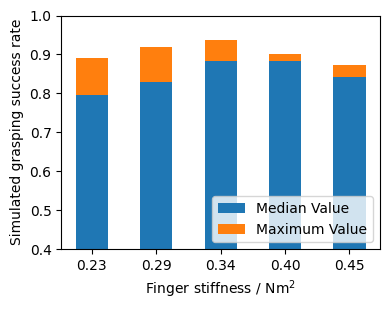

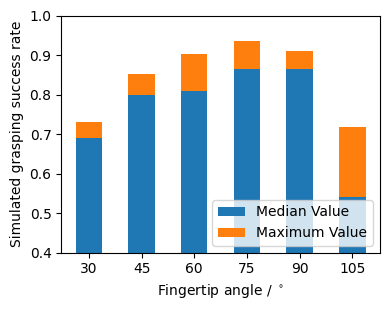

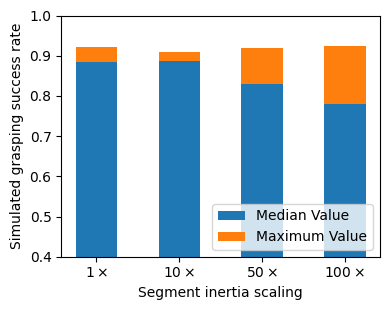

In [6]:
def plot_max_median(labels, medians, maxes, title=None):
  """
  Plot a stacked bar chart of median and max training performance
  """

  weight_counts = {
      "Median Value": np.array(medians),
      "Maximum Value": np.array(maxes) - np.array(medians),
  }
  width = 0.5

  fig, ax = plt.subplots()
  bottom = np.zeros(len(labels))

  for boolean, weight_count in weight_counts.items():
      p = ax.bar(labels, weight_count, width, label=boolean, bottom=bottom)
      bottom += weight_count

  if title is not None:
     ax.set_title("Number of penguins with above average body mass")
  ax.legend(loc="lower right")

  ax.set_ylabel("Simulated grasping success rate")
  ax.set_ylim(bottom=0.4, top=1.0)
  fig.set_size_inches(5*0.8, 4*0.8)
  fig.tight_layout()

  return fig, ax

angle_labels = ["30", "45", "60", "75", "90", "105"]
angle_medians = [
  0.691,
  0.799,
  0.808,
  0.865,
  0.864,
  0.542,
]
angle_maxes = [
  0.730,
  0.852,
  0.903,
  0.936,
  0.910,
  0.719,
]
stiffness_labels = ["0.23", "0.29", "0.34", "0.40", "0.45"]
stiffness_medians = [
  0.796,
  0.830,
  0.882,
  0.882,
  0.841,
]
stiffness_maxes = [
  0.890,
  0.918,
  0.936,
  0.900,
  0.872,
]
inertia_labels = [r"$1\times$", r"$10\times$", r"$50\times$", r"$100\times$"]
inertia_medians = [
  0.885,
  0.887,
  0.830,
  0.779,
]
inertia_maxes = [
  0.921,
  0.910,
  0.918,
  0.924,
]


fig1, ax1 = plot_max_median(stiffness_labels, stiffness_medians, stiffness_maxes)
fig2, ax2 = plot_max_median(angle_labels, angle_medians, angle_maxes)
fig3, ax3 = plot_max_median(inertia_labels, inertia_medians, inertia_maxes)

ax1.set_xlabel(r"Finger stiffness / Nm$^2$")
ax2.set_xlabel(r"Fingertip angle / $^\circ$")
ax3.set_xlabel("Segment inertia scaling")
fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()

if False and overwrite: 
  fig1.savefig(save_path + "stiffness_pilot.png")
  fig2.savefig(save_path + "angle_pilot.png")
  fig3.savefig(save_path + "inertia_scaling.png")

gradients are: [0.28275147047606597, 0.306267318455896, 0.37895647344518796]
gradient_error, unit = %, threshold = 0.5
All errors [6.229384876519595, 0.429373789107088, 1.6498099761072964]
Average of all errors is 2.769522880577993
Maximum of all errors is 6.229384876519595
area_error, unit = %, threshold = 0.05
All errors [2.973837174051849, 1.2911375507736134, 0.7290259966307069]
Average of all errors is 1.6646669071520563
Maximum of all errors is 2.973837174051849
force_error, unit = mN, threshold = 0.05
All errors [23.44661330183347, 24.677525548373954, 30.715810901978436]
All maximum errors [51.0093979537487, 57.48295783996582, 78.71834933757782]
Average of all errors is 26.27998325072862
Maximum of all errors is 30.715810901978436
Maximum maximum error is 78.71834933757782


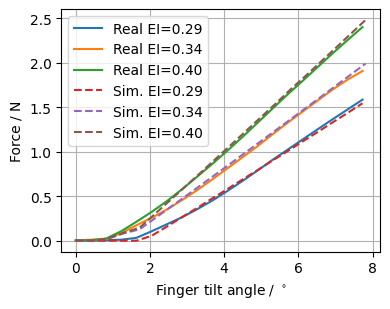

In [13]:
def tilt(error_type="force_error", plot=True, threshold=0.1, save=False):

  if error_type == "area_error":
    area_error = True
    rel_error = False
    gradient_error = False
  elif error_type == "gradient_error":
    area_error = False
    rel_error = False
    gradient_error = True
  elif error_type == "relative_error":
    area_error = False
    rel_error = True
    gradient_error = False
  elif error_type == "force_error":
    area_error = False
    rel_error = False
    gradient_error = False
  else:
    raise RuntimeError("error_type not recognised")


  # Path to your CSV file (replace 'data.csv' with your file path)
  csv_file_path = "sim_vs_real_forces_tilt.csv"

  # Load data from CSV file
  data = load_data_from_csv(csv_file_path)
  segments = list(range(3, 31))

  stiffnesses = [
    "EI1", 
    "EI2", 
    "EI3"
  ]

  eis = [r"$EI=0.29$Nm$^2$", r"$EI=0.34$Nm$^2$", r"$EI=0.40$Nm$^2$"]

  subplot = True
  if plot:
    if subplot:
      fig, ax = plt.subplots(1, 1)
      axs = [ax, ax, ax]
    else:
      fig = []
      axs = []
      for i in range(len(stiffnesses)):
        f, a = plt.subplots(1, 1)
        fig.append(f)
        axs.append(a)

  # number of datapoints to offset sim compared to real, +ve will fail due to [:offset]
  angle = True
  offsets = [-1, -0.3, -0.3] # very small mismatch if xy motor position
  clip_at = 95.1 # end of real data

  # angle = False
  # offsets = [0, 0, 0]
  # clip_at = None

  # Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
  column_names = [
    "XY pos", # 0
    "Real EI1", # 1
    "Real EI2", # 2
    "Real EI3", # 3
    "Y sim", # 4
    "Y adjusted EI1", # 5
    "Kp=9 EI1", # 6
    "Kp=10 EI1", # 7
    "Kp=11 EI1", # 8
    "Kp=12 EI1", # 9
    "Kp=14 EI1", # 10
    "Kp=12.95 EI1", # 11
    "Y adjusted EI2", # 12
    "Kp=11 EI2", # 13
    "Kp=12 EI2", # 14
    "Kp=13 EI2", # 15
    "Kp=12.64 EI2", # 16
    "Y adjusted EI3", # 17
    "Kp=14 EI3", # 18
    "Kp=15 EI3", # 19
    "Kp=16 EI3", # 20
    "Kp=17.76 EI3", # 21
  ]

  if subplot:
    data_indexes_to_plot = [
      [[0, 1], [0, 8]],
      [[0, 2], [0, 16]],
      [[0, 3], [0, 21]]
    ]
    legends = ["Real EI=0.29", "Real EI=0.34", "Real EI=0.40", "Sim. EI=0.29", "Sim. EI=0.34", "Sim. EI=0.40"]
  else:
    data_indexes_to_plot = [
      [[0, 1], [5, 6, 7, 8, 9, 10, 11]],
      [[0, 2], [12, 13, 14, 15, 16]],
      [[0, 3], [17, 18, 19, 20, 21]]
    ]

  reals = []
  sims = []

  # calculate error values
  errors = [0 for i in range(len(stiffnesses))]
  maxes = [0 for i in range(len(stiffnesses))]
  grads = [0 for i in range(len(stiffnesses))]

  for s, stiffness in enumerate(stiffnesses):

    data_real = [np.array(data[column_names[data_indexes_to_plot[s][0][0]]])]
    for i in range(1, len(data_indexes_to_plot[s][0])):
      data_real.append(np.array(data[column_names[data_indexes_to_plot[s][0][i]]]))
    data_sim = [np.array(data[column_names[data_indexes_to_plot[s][1][0]]])]
    for i in range(1, len(data_indexes_to_plot[s][1])):
      data_sim.append(np.array(data[column_names[data_indexes_to_plot[s][1][i]]]))

    for i in range(1, len(data_indexes_to_plot[s][0])):
      x_real = data_real[0][:]
      y_real = data_real[i][:]
      x_real = x_real[~np.isnan(x_real)]
      y_real = y_real[~np.isnan(y_real)]
      if angle:
        x_real = np.arctan2(100 - x_real, 35) * (180.0/np.pi)
      if subplot:
        reals.append([x_real, y_real])
      else:
        if plot: axs[s].plot(x_real, y_real)

    for i in range(1, len(data_indexes_to_plot[s][1])):
      x_sim = data_sim[0][:] + offsets[s]
      y_sim = data_sim[i][:]
      x_sim = np.insert(x_sim, 0, 100)
      y_sim = np.insert(y_sim, 0, 0)
      if clip_at is not None:
        clip_ind = np.argmax(x_sim < clip_at)
        x_sim = x_sim[:clip_ind]
        y_sim = y_sim[:clip_ind]
      if angle:
        x_sim = np.arctan2(100 - x_sim, 35) * (180.0/np.pi)
      if subplot:
        sims.append([x_sim, y_sim])
      else:
        if plot: axs[s].plot(x_sim, y_sim, "--")
    
    if plot:
      # axs[s].set_title(f"Stiffness {eis[s]}")
      axs[s].set_ylabel("Force / N")
      if angle:
        axs[s].set_xlabel(r"Finger tilt angle / $^\circ$")
      else:
        axs[s].set_xlabel("Y motor position / mm")
      axs[s].grid()

    if plot and not subplot:
      real_legend = [column_names[data_indexes_to_plot[s][0][c]] for c in range(1, len(data_indexes_to_plot[s][0]))]
      sim_legend = [column_names[data_indexes_to_plot[s][1][c]] for c in range(1, len(data_indexes_to_plot[s][1]))]
      axs[s].legend([*real_legend, *sim_legend])
      fig[s].set_size_inches(5*0.8, 4*0.8)
      fig[s].tight_layout()
      if save: fig[s].savefig(save_path + f"sim_vs_real_forces_{stiffness}.png")

  if subplot and angle:
    for i in range(len(stiffnesses)):
      factor = 100 if rel_error else 1000
      for j in range(len(sims[i][1]) - 1):
        if reals[i][1][j] > threshold:
          if area_error:
            profile_errors = mjenv.mj.profile_error(
              reals[i][0][j:], reals[i][1][j:],
              sims[i][0][j:], sims[i][1][j:],
              False
            )
            error_area = mjenv.mj.curve_area(reals[i][0][j:], profile_errors)
            sim_area = mjenv.mj.curve_area(sims[i][0][j:], sims[i][1][j:])
            real_area = mjenv.mj.curve_area(reals[i][0][j:], reals[i][1][j:])
            errors[i] = 100 * abs((error_area) / real_area)
            break
          elif gradient_error:
            real_slope = np.polyfit(reals[i][0][j:], reals[i][1][j:], 1)[0]
            sim_slope = np.polyfit(sims[i][0][j:], sims[i][1][j:], 1)[0]
            errors[i] = 100 * abs((real_slope - sim_slope) / real_slope)
            grads[i] = real_slope
          else:
            errors[i] = factor * np.average(np.abs(mjenv.mj.profile_error(
              reals[i][0][j:], reals[i][1][j:],
              sims[i][0], sims[i][1],
              rel_error
            )))
            maxes[i] = factor * np.max(np.abs(mjenv.mj.profile_error(
              reals[i][0][j:], reals[i][1][j:],
              sims[i][0], sims[i][1],
              rel_error
            )))
          break

  if plot and subplot:
    for i in range(len(stiffnesses)):
      # if angle:
      #   reals[i][0] = np.arctan2(100 - reals[i][0], 35) * (180.0/np.pi)
      axs[0].plot(reals[i][0], reals[i][1])
    for i in range(len(stiffnesses)):
      # if angle:
      #   sims[i][0] = np.arctan2(100 - sims[i][0], 35) * (180.0/np.pi)
      axs[0].plot(sims[i][0], sims[i][1], "--")
    axs[0].legend(legends)
    fig.set_size_inches(5*0.8, 4*0.8)
    fig.tight_layout()
    if save: fig.savefig(save_path + "sim_vs_real_forces_tilt.png")

  # if gradient_error: print("gradients are:", grads)

  unit = "%" if (rel_error or gradient_error or area_error) else "mN"
  print(f"{error_type}, unit = {unit}, threshold = {threshold}")
  print(f"All errors", errors)
  if (not gradient_error and not area_error): print(f"All maximum errors", maxes)
  print(f"Average of all errors is", np.average(errors))
  print(f"Maximum of all errors is", np.max(errors))
  if (not gradient_error and not area_error): print(f"Maximum maximum error is", np.max(maxes))

tilt(error_type="gradient_error", threshold=0.5, plot=False, save=False)
tilt(error_type="area_error", threshold=0.05, plot=False, save=False)
tilt(error_type="force_error", threshold=0.05, plot=True, save=False)

gradients are [[-0.053783333333333405, -0.05534722222222251, -0.05670036630036635], [-0.059544999999999994, -0.06119227272727276, -0.06202963235294111], [-0.06922380952380985, -0.07181818181818199, -0.06661078431372539]]
Average grad [-0.05527697395197409, -0.060922301693404624, -0.06921759188523909]
gradient_error, unit = %, threshold = 0.25
All errors [[2.2431980167338366, 0.166353826851096, 2.456114011060104], [6.969854731715463, 5.111392555506852, 3.8343557336804603], [5.487053724977266, 3.0261772151896666, 11.359640801848688]]
Average of all errors is 4.517126735284825
Maximum of all errors is 11.359640801848688
area_error, unit = %, threshold = 0.05
All errors [[10.156805546404156, 6.663096557750925, 5.261294477400204], [14.90145050608529, 11.305596782512273, 8.16049878892763], [3.0300076857168046, 4.26527322687265, 6.700792421670183]]
Average of all errors is 7.82720177703779
Maximum of all errors is 14.90145050608529
force_error, unit = mN, threshold = 0.05
All errors [[37.7641

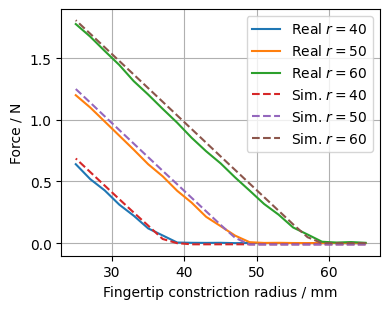

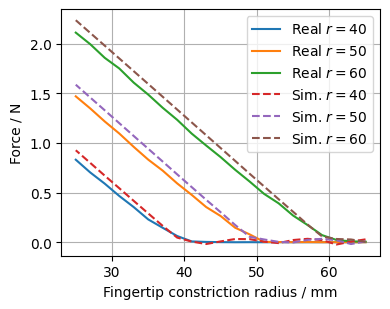

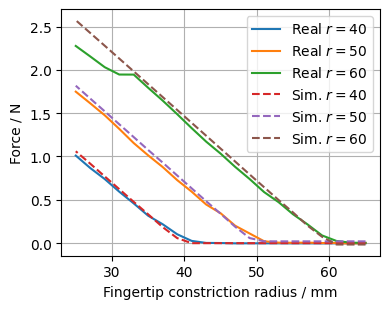

In [15]:
def constrict(error_type="force_error", plot=True, threshold=0.1, save=False):

  if error_type == "area_error":
    area_error = True
    rel_error = False
    gradient_error = False
  elif error_type == "gradient_error":
    area_error = False
    rel_error = False
    gradient_error = True
  elif error_type == "relative_error":
    area_error = False
    rel_error = True
    gradient_error = False
  elif error_type == "force_error":
    area_error = False
    rel_error = False
    gradient_error = False
  else:
    raise RuntimeError("error_type not recognised")

  # Path to your CSV file (replace 'data.csv' with your file path)
  csv_file_path = "sim_vs_real_forces_constrict.csv"

  # Load data from CSV file
  data = load_data_from_csv(csv_file_path)
  segments = list(range(3, 31))

  stiffnesses = [
    "EI1", 
    "EI2", 
    "EI3"
  ]

  eis = [r"$EI=0.29$Nm$^2$", r"$EI=0.34$Nm$^2$", r"$EI=0.40$Nm$^2$"]

  if plot:
    subplot = False
    if subplot:
      fig, axs = plt.subplots(1, len(stiffnesses))
    else:
      fig = []
      axs = []
      for i in range(len(stiffnesses)):
        f, a = plt.subplots(1, 1)
        fig.append(f)
        axs.append(a)

  # number of data points at the start to skip (130 -> 104mm)
  skips = [16, 16, 16]

  # number of datapoints to offset sim compared to real, +ve will fail due to [:offset]
  offsets = [-1, 0, 0] # -1=2mm
  offset_mm = [0, 0, 0]

  # Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
  column_names = [
    "XY pos", # 0
    "Real 80", # 1
    "Real 100", # 2
    "Real 120", # 3
    "Sim 80", # 4
    "Sim 100", # 5
    "Sim 120", # 6
  ]

  data_indexes_to_plot = [
    [0],
    [1, 2, 3],
    [4, 5, 6]
  ]
  legends = [r"Real $r=40$", r"Real $r=50$", r"Real $r=60$",
            r"Sim. $r=40$", r"Sim. $r=50$", r"Sim. $r=60$"]

  # calculate error values (and maximum error values)
  errors = [[0 for i in range(len(data_indexes_to_plot[1]))] for j in range(len(stiffnesses))]
  maxes = [[0 for i in range(len(data_indexes_to_plot[1]))] for j in range(len(stiffnesses))]
  grads = [[0 for i in range(len(data_indexes_to_plot[1]))] for j in range(len(stiffnesses))]

  for s, stiffness in enumerate(stiffnesses):

    data_np = [np.array(data[column_names[0]])]
    for i in range(1, len(column_names)):
      data_np.append(np.array(data[column_names[i] + " " + stiffness]))

    for i in range(len(data_indexes_to_plot[1])):
      x_real = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35 - offset_mm[s]
      y_real = data_np[data_indexes_to_plot[1][i]][skips[s] - 1:]
      if plot: axs[s].plot(x_real, y_real)

    for i in range(len(data_indexes_to_plot[1])):
      # x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35 + offsets[s]
      # y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
      if offsets[s] != 0:
        x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1 + offsets[s]:offsets[s]] - 35 + 2*offsets[s]
        y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1 + offsets[s]:offsets[s]]
      else:
        x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35# + offset_mm[s]
        y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
      if plot: axs[s].plot(x_sim, y_sim, "--")
      
    for i in range(len(data_indexes_to_plot[1])):
      x_real = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
      y_real = data_np[data_indexes_to_plot[1][i]][skips[s] - 1:]
      # x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
      # y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
      if offsets[s] != 0:
        x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1 + offsets[s]:offsets[s]] - 35 + 2*offsets[s]
        y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1 + offsets[s]:offsets[s]]
      else:
        x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35# + offset_mm[s]
        y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1:]
      factor = 100 if rel_error else 1000
      for j in range(len(x_real)):
        if y_real[j] > threshold:
          if area_error:
            profile_errors = mjenv.mj.profile_error(
              np.flip(x_real[j:]), y_real[j:],
              np.flip(x_sim[j:]), y_sim[j:],
              False
            )
            error_area = mjenv.mj.curve_area(np.flip(x_real[j:]), profile_errors)
            sim_area = mjenv.mj.curve_area(np.flip(x_sim[j:]), y_sim[j:])
            real_area = mjenv.mj.curve_area(np.flip(x_real[j:]), y_real[j:])
            errors[s][i] = 100 * abs((error_area) / real_area)
            break
          elif gradient_error:
            real_slope = np.polyfit(x_real[j:], y_real[j:], 1)[0]
            sim_slope = np.polyfit(x_sim[j:], y_sim[j:], 1)[0]
            errors[s][i] = 100 * abs((real_slope - sim_slope) / real_slope)
            grads[s][i] = real_slope
          else:
            errors[s][i] = factor * np.average(np.abs(mjenv.mj.profile_error(
              np.flip(x_real[j:]), np.flip(y_real[j:]),
              np.flip(x_sim), np.flip(y_sim),
              rel_error
            )))
            maxes[s][i] = factor * np.max(np.abs(mjenv.mj.profile_error(
              np.flip(x_real[j:]), np.flip(y_real[j:]),
              np.flip(x_sim), np.flip(y_sim),
              rel_error
            )))
          break

    if plot:
      # axs[s].set_title(f"Stiffness {eis[s]}")
      axs[s].set_ylabel("Force / N")
      axs[s].set_xlabel("Fingertip constriction radius / mm")
      axs[s].grid()

      if subplot:
        if s == 0:
          axs[s].legend(legends)
      else:
        axs[s].legend(legends)
        fig[s].set_size_inches(5*0.8, 4*0.8)
        fig[s].tight_layout()
        if save: fig[s].savefig(save_path + f"sim_vs_real_forces_{stiffness}.png")

  # if gradient_error: 
  #   print("gradients are", grads)
  #   print("Average grad", [np.average(np.array(g)) for g in grads])

  if plot and subplot:
    fig.set_size_inches(5 * ((2/3) * len(stiffnesses)), 3.5)
    fig.tight_layout()
    if save: fig.savefig(save_path + "sim_vs_real_forces_subplot.png")

  unit = "%" if (rel_error or gradient_error or area_error) else "mN"
  print(f"{error_type}, unit = {unit}, threshold = {threshold}")
  print(f"All errors", errors)
  if (not gradient_error and not area_error): print(f"All maximum errors", maxes)
  print(f"Average of all errors is", np.average(errors))
  print(f"Maximum of all errors is", np.max(errors))
  if (not gradient_error and not area_error): print(f"Maximum maximum error is", np.max(maxes))

constrict(error_type="gradient_error", threshold=0.25, plot=False, save=False)
constrict(error_type="area_error", threshold=0.05, plot=False, save=False)
constrict(error_type="force_error", threshold=0.05, plot=True, save=False)

In [9]:
import scipy.stats as stats
import math

confidence_level = 0.95
stdevs_from_mean = 1.0

probability_of_success = 1 - stats.norm.cdf(stdevs_from_mean)
n = math.ceil(math.log(1 - confidence_level) / math.log(1 - probability_of_success))

print(f"Number of runs needed to have {confidence_level*100:.0f}% confidence at least one is greater than {stdevs_from_mean} standard deviations above the mean:", n)

Number of runs needed to have 95% confidence at least one is greater than 1.0 standard deviations above the mean: 18


In [10]:
import math

n = 15  # number of runs
confidence_level = 0.95

probability_of_success = 1 - (1 - confidence_level) ** (1 / n)
stdevs_from_mean = -stats.norm.ppf(probability_of_success)

print("Probability of success:", probability_of_success)
print(f"Given {n} runs, there is {confidence_level*100:.0f}% confidence at least one is greater than {stdevs_from_mean:.2f} standard deviations above the mean")

Probability of success: 0.18103627252208465
Given 15 runs, there is 95% confidence at least one is greater than 0.91 standard deviations above the mean
